In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(
    style='white',
    context='notebook',
    font_scale=1.5
)

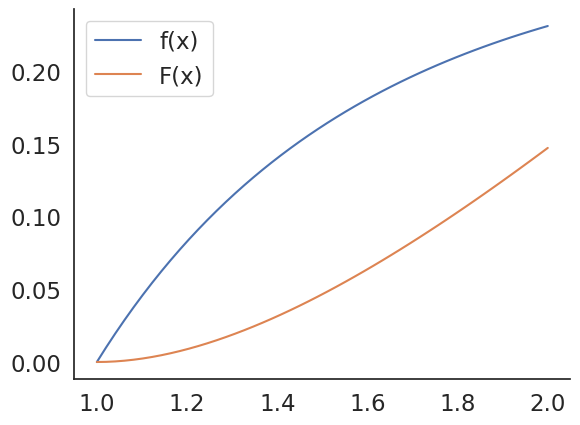

In [2]:
from scipy import integrate

x = np.linspace(1, 2)
def f(x): 
    return np.log(x)/(1+x)

@np.vectorize # vectorize lets F work on arrays rather than scalars
def F(x):
    return integrate.quad(f, a=1, b=x)[0]

plt.plot(x, f(x), label='f(x)')
plt.plot(x, F(x), label='F(x)')
plt.legend()
sns.despine()

In [5]:
import sympy
print("SymPy version:", sympy.__version__)
sympy.init_printing() # for notebook display

x = np.linspace(1, 2)

t = sympy.symbols('t')
f = sympy.ln(t)/(1+t)

SymPy version: 1.12
log(t)/(t + 1)


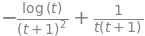

In [9]:
dfdt = sympy.diff(f, t)

fx = [f.evalf(subs={t: xi}) for xi in x]
dfx = [dfdt.evalf(subs={t: xi}) for xi in x]
dfdt

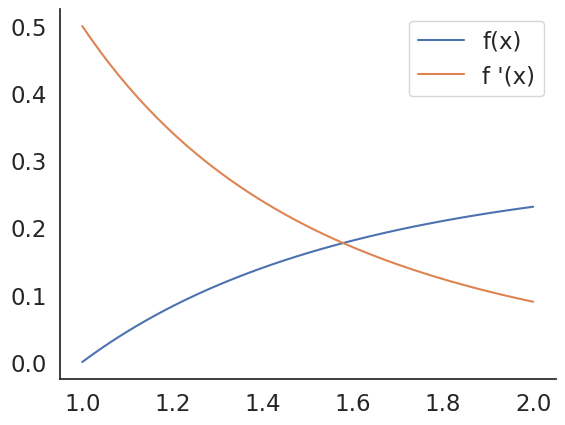

In [13]:
plt.plot(x, fx, label='f(x)')
plt.plot(x, dfx, label='f \'(x)')
plt.legend(loc='upper right')
sns.despine()

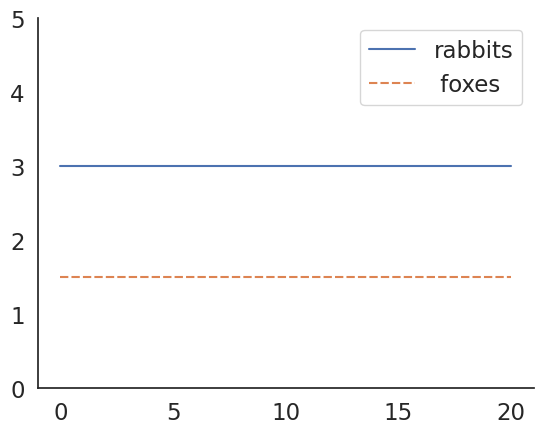

In [24]:
from scipy import integrate
import pandas as pd
params = {
    "a": 1.5,
    "b": 1.0,
    "c": 1.0,
    "d": 3.0
}

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ params["a"]*X[0] - params["b"]*X[0]*X[1] ,
                      params["c"]*X[0]*X[1] - params["d"]*X[1] ])

t = np.linspace(0, 20,  1000)              # time
X0 = np.array([3.0, 1.5])                     # initials conditions: 3 rabbits and 1.5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)

rabbits, foxes = X.T

lotka_volterra_df = pd.DataFrame(data=X, index=t, columns=["rabbits", " foxes"])
sns.lineplot(data=lotka_volterra_df)
plt.ylim(0,5)
sns.despine()